In [1]:
from __future__ import print_function
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init stereo aruco detector scene builder

In [2]:
from pkg.detector.aruco.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None)
# s_builder.reset_reference_coord(ref_name="floor")

In [3]:
from pkg.planning.filtering.reach_filter import ReachTrainer
from pkg.controller.combined_robot import *

In [4]:
rtrain = ReachTrainer(scene_builder=s_builder)

## collect and train

In [ ]:
rtrain.collect_and_learn(RobotType.indy7, "indy0_tcp", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=0.3)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

In [ ]:
rtrain.collect_and_learn(RobotType.panda, "panda0_hand", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=1)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

## load and train

In [5]:
C_svm_list = [64, 128, 256, 512, 1024, 2048, 4096]
test_indy_list = []
# test_panda_list = []
for C_svm in C_svm_list:
    test_indy = rtrain.load_and_learn(RobotType.indy7, C_svm=C_svm)
#     test_panda = rtrain.load_and_learn(RobotType.panda, C_svm=C_svm)
    test_indy_list.append(test_indy)
#     test_panda_list.append(test_panda)

trainset: 	581.5 ms/1 = 581.5 ms (581.465/581.465)
testset: 	142.8 ms/1 = 142.8 ms (142.844/142.844)

trainning accuracy = 98.76 %
test accuracy = 97.96 %
trainning success accuracy = 98.69 %
trainning failure accuracy = 98.78 %
test success accuracy = 97.56 %
test failure accuracy = 98.1 %
trainset: 	508.7 ms/1 = 508.7 ms (508.652/508.652)
testset: 	124.6 ms/1 = 124.6 ms (124.633/124.633)

trainning accuracy = 98.98 %
test accuracy = 98.24 %
trainning success accuracy = 99.02 %
trainning failure accuracy = 98.96 %
test success accuracy = 97.94 %
test failure accuracy = 98.35 %
trainset: 	463.0 ms/1 = 463.0 ms (462.989/462.989)
testset: 	113.4 ms/1 = 113.4 ms (113.358/113.358)

trainning accuracy = 99.0 %
test accuracy = 98.24 %
trainning success accuracy = 98.95 %
trainning failure accuracy = 99.02 %
test success accuracy = 97.94 %
test failure accuracy = 98.35 %
trainset: 	402.5 ms/1 = 402.5 ms (402.513/402.513)
testset: 	98.5 ms/1 = 98.5 ms (98.453/98.453)

trainning accuracy = 99.2

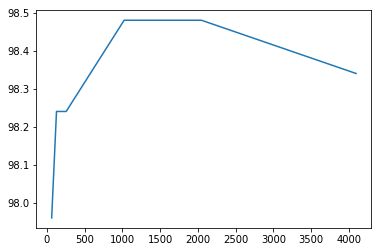

In [8]:
import matplotlib.pyplot as plt
plt.plot(C_svm_list, test_indy_list)
# plt.plot(C_svm_list, test_panda_list)

In [9]:
rtrain.load_and_learn(RobotType.indy7, C_svm=1000)
# rtrain.load_and_learn(RobotType.panda, C_svm=1000)

trainset: 	362.9 ms/1 = 362.9 ms (362.889/362.889)
testset: 	89.7 ms/1 = 89.7 ms (89.697/89.697)

trainning accuracy = 99.36 %
test accuracy = 98.48 %
trainning success accuracy = 99.24 %
trainning failure accuracy = 99.4 %
test success accuracy = 97.94 %
test failure accuracy = 98.67 %


98.48

## load and test

In [10]:
rtrain.load_and_test(RobotType.indy7)
rtrain.load_and_test(RobotType.panda)

trainset: 	362.3 ms/1 = 362.3 ms (362.345/362.345)
testset: 	90.3 ms/1 = 90.3 ms (90.339/90.339)

trainning accuracy = 99.36 %
test accuracy = 98.48 %
trainning success accuracy = 99.24 %
trainning failure accuracy = 99.4 %
test success accuracy = 97.94 % (1285/1312)
test failure accuracy = 98.67 % (3639/3688)
trainset: 	433.1 ms/1 = 433.1 ms (433.096/433.096)
testset: 	113.5 ms/1 = 113.5 ms (113.549/113.549)

trainning accuracy = 98.85 %
test accuracy = 98.26 %
trainning success accuracy = 97.57 %
trainning failure accuracy = 99.13 %
test success accuracy = 95.29 % (829/870)
test failure accuracy = 98.89 % (4084/4130)


98.26

In [8]:
rtrain.load_and_test(RobotType.indy7)
rtrain.load_and_test(RobotType.panda)

trainset: 	345.9 ms/1 = 345.9 ms (345.906/345.906)
testset: 	86.3 ms/1 = 86.3 ms (86.256/86.256)

trainning accuracy = 99.36 %
test accuracy = 98.48 %
trainning success accuracy = 99.24 %
trainning failure accuracy = 99.4 %
test success accuracy = 97.94 % (1285/1312)
test failure accuracy = 98.67 % (3639/3688)
trainset: 	417.2 ms/1 = 417.2 ms (417.198/417.198)
testset: 	103.8 ms/1 = 103.8 ms (103.765/103.765)

trainning accuracy = 98.85 %
test accuracy = 98.26 %
trainning success accuracy = 97.57 %
trainning failure accuracy = 99.13 %
test success accuracy = 95.29 % (829/870)
test failure accuracy = 98.89 % (4084/4130)


98.26

## Update label

In [5]:
from pkg.planning.filtering.reach_filter import *

In [7]:
ROBOT_TYPE = RobotType.indy7
TIP_LINK = "indy0_tcp"
TIMEOUT = 0.3
DATA_DIVS = ["train", "test"]
UPDATE_LABELS = [True] # to reduce feasible ones, as joint limit is reduced

connection command:
indy0: False


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


added robot collision boundaries
600 / 20000 (20 / 667 s): current success ratio = 0.25425
700 / 20000 (22 / 635 s): current success ratio = 0.254
1100 / 20000 (34 / 624 s): current success ratio = 0.2527
1200 / 20000 (37 / 618 s): current success ratio = 0.2525
2200 / 20000 (67 / 610 s): current success ratio = 0.2492
2500 / 20000 (77 / 623 s): current success ratio = 0.24805
3000 / 20000 (94 / 631 s): current success ratio = 0.2461
3300 / 20000 (105 / 641 s): current success ratio = 0.2448
3500 / 20000 (112 / 645 s): current success ratio = 0.24405
3700 / 20000 (118 / 641 s): current success ratio = 0.24345
4000 / 20000 (130 / 650 s): current success ratio = 0.24215
5000 / 20000 (163 / 655 s): current success ratio = 0.23845
5300 / 20000 (172 / 652 s): current success ratio = 0.2375
5500 / 20000 (181 / 661 s): current success ratio = 0.23635
6000 / 20000 (196 / 654 s): current success ratio = 0.2348
6400 / 20000 (209 / 653 s): current success ratio = 0.2334
6700 / 20000 (222 / 664 s)

Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


added robot collision boundaries
0 / 5000 (0 / 181059 s): current success ratio = 0.2624
200 / 5000 (7 / 183 s): current success ratio = 0.2592
300 / 5000 (10 / 183 s): current success ratio = 0.2574
800 / 5000 (28 / 177 s): current success ratio = 0.2492
1200 / 5000 (42 / 175 s): current success ratio = 0.243
1500 / 5000 (51 / 171 s): current success ratio = 0.239
2000 / 5000 (68 / 172 s): current success ratio = 0.2318
2100 / 5000 (71 / 171 s): current success ratio = 0.2306
3000 / 5000 (101 / 168 s): current success ratio = 0.2178
3100 / 5000 (104 / 168 s): current success ratio = 0.2164
3200 / 5000 (109 / 170 s): current success ratio = 0.2142
3500 / 5000 (117 / 167 s): current success ratio = 0.2112
4200 / 5000 (147 / 175 s): current success ratio = 0.1966


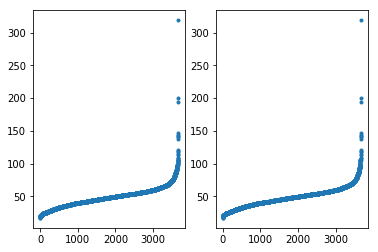

In [8]:
time_lists = []
for DATA_DIV in DATA_DIVS:
    rtrain.update_label(robot_type=ROBOT_TYPE, tip_link=TIP_LINK, data_div=DATA_DIV, update_labels=UPDATE_LABELS, timeout=TIMEOUT)
    time_lists.append(deepcopy(rtrain.time_list))
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(sorted(time_lists[0]), '.')
plt.subplot(1,2,2)
plt.plot(sorted(time_lists[0]), '.')